In [ ]:
# Import fundamental packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import datetime

In [ ]:
# Connect Colab with Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# First data observation
FOLDER_PATH = "/content/drive/MyDrive/Machine Learning/Case Study/Solution" # Identify folder location
original_data = pd.read_csv(os.path.join(FOLDER_PATH, "data.csv"), parse_dates=['Date'], dtype={'Store':str, 'Dept':str}) # Read data first time

In [ ]:
# Check dataset
print("The heading of dataset:")
original_data.head()

The heading of dataset:


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,Meta1,Meta2,Meta3,Meta4,Meta5,CPI,Unemployment,Type,Size
0,26,92,2011-08-26,87235.57,False,61.10,3.796,NaN,NaN,NaN,NaN,NaN,136.213613,7.767,A,152513
1,34,22,2011-03-25,5945.97,False,53.11,3.480,NaN,NaN,NaN,NaN,NaN,128.616064,10.398,A,158114
2,21,28,2010-12-03,1219.89,False,50.43,2.708,NaN,NaN,NaN,NaN,NaN,211.265543,8.163,B,140167
3,8,9,2010-09-17,11972.71,False,75.32,2.582,NaN,NaN,NaN,NaN,NaN,214.878556,6.315,A,155078
4,19,55,2012-05-18,8271.82,False,58.81,4.029,12613.98,NaN,11.5,1705.28,3600.79,138.106581,8.150,A,203819


In [ ]:
# Check dataset
print("The tail of dataset:")
original_data.tail()

The tail of dataset:


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,Meta1,Meta2,Meta3,Meta4,Meta5,CPI,Unemployment,Type,Size
282446,27,18,2012-10-19,20775.91,False,56.53,4.153,2639.32,NaN,4.77,575.48,3147.23,142.863363,8.000,A,204184
282447,39,36,2010-05-21,5350.00,False,76.67,2.826,NaN,NaN,NaN,NaN,NaN,209.392294,8.464,A,184109
282448,14,29,2010-04-30,10939.87,False,53.15,2.921,NaN,NaN,NaN,NaN,NaN,181.662036,8.899,A,200898
282449,15,90,2011-07-01,5013.89,False,67.43,3.916,NaN,NaN,NaN,NaN,NaN,135.446800,7.806,B,123737
282450,13,32,2011-10-14,8103.12,False,51.74,3.567,NaN,NaN,NaN,NaN,NaN,129.770645,6.392,A,219622


In [ ]:
original_data.dtypes

Store                   object
Dept                    object
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
Meta1                  float64
Meta2                  float64
Meta3                  float64
Meta4                  float64
Meta5                  float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
dtype: object

In [ ]:
original_data.describe()

,Weekly_Sales,Temperature,Fuel_Price,Meta1,Meta2,Meta3,Meta4,Meta5,CPI,Unemployment,Size
count,282451.000000,282451.000000,282451.000000,100520.000000,74232.000000,91521.000000,90031.000000,101029.000000,282451.000000,282451.000000,282451.000000
mean,15983.429692,60.113640,3.360300,7246.077559,3318.408122,1417.397841,3379.591745,4639.476021,171.207802,7.968098,136730.073220
std,22661.092494,18.446485,0.458602,8254.606267,9485.575898,9547.858949,6269.428446,6060.459590,39.160808,1.868070,61002.319363
min,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,2079.330000,46.780000,2.932000,2241.190000,40.960000,5.060000,508.100000,1877.810000,132.022667,6.891000,93638.000000
50%,7616.550000,62.150000,3.452000,5363.520000,191.820000,24.340000,1482.030000,3364.410000,182.350989,7.866000,140167.000000
75%,20245.745000,74.290000,3.737000,9235.590000,1919.790000,103.130000,3607.570000,5563.800000,212.464799,8.572000,202505.000000
max,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


**Assignment 1**

> Perform Descriptive Time Series Analysis

> Build Models to predict weekly sales for each store



1.   List item
2.   List item



*   Store, Dept: Object --> not number. It is code_id --> OK
*   Weekly_Sales: Float --> OK
*   Size: Integer  --> OK







In [ ]:
# Question: Is the dataset is completed or not? - Especially time series (Date column)
# First examination is weekly sales data => complete => assume the dataset is completed

def date_split(dataset):
  dataset['Year'] = dataset.Date.dt.year
  dataset['Month'] = dataset.Date.dt.month
  dataset['Day'] = dataset.Date.dt.day
  dataset['Week_num'] = [item.isocalendar()[1] for item in dataset['Date']]

date_split(original_data)
original_data.head() #Checking data after manipulating

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,Meta1,Meta2,Meta3,Meta4,Meta5,CPI,Unemployment,Type,Size,Year,Month,Day,Week_num
0,26,92,2011-08-26,87235.57,False,61.10,3.796,NaN,NaN,NaN,NaN,NaN,136.213613,7.767,A,152513,2011,8,26,34
1,34,22,2011-03-25,5945.97,False,53.11,3.480,NaN,NaN,NaN,NaN,NaN,128.616064,10.398,A,158114,2011,3,25,12
2,21,28,2010-12-03,1219.89,False,50.43,2.708,NaN,NaN,NaN,NaN,NaN,211.265543,8.163,B,140167,2010,12,3,48
3,8,9,2010-09-17,11972.71,False,75.32,2.582,NaN,NaN,NaN,NaN,NaN,214.878556,6.315,A,155078,2010,9,17,37
4,19,55,2012-05-18,8271.82,False,58.81,4.029,12613.98,NaN,11.5,1705.28,3600.79,138.106581,8.150,A,203819,2012,5,18,20


In [ ]:
# Check the data after manipulating
original_data.describe()

,Weekly_Sales,Temperature,Fuel_Price,Meta1,Meta2,Meta3,Meta4,Meta5,CPI,Unemployment,Size,Year,Month,Day,Week_num
count,282451.000000,282451.000000,282451.000000,100520.000000,74232.000000,91521.000000,90031.000000,101029.000000,282451.000000,282451.000000,282451.000000,282451.000000,282451.00000,282451.000000,282451.000000
mean,15983.429692,60.113640,3.360300,7246.077559,3318.408122,1417.397841,3379.591745,4639.476021,171.207802,7.968098,136730.073220,2010.966486,6.45120,15.670120,25.833196
std,22661.092494,18.446485,0.458602,8254.606267,9485.575898,9547.858949,6269.428446,6060.459590,39.160808,1.868070,61002.319363,0.796422,3.24185,8.747934,14.143636
min,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000,2010.000000,1.00000,1.000000,1.000000
25%,2079.330000,46.780000,2.932000,2241.190000,40.960000,5.060000,508.100000,1877.810000,132.022667,6.891000,93638.000000,2010.000000,4.00000,8.000000,14.000000
50%,7616.550000,62.150000,3.452000,5363.520000,191.820000,24.340000,1482.030000,3364.410000,182.350989,7.866000,140167.000000,2011.000000,6.00000,16.000000,26.000000
75%,20245.745000,74.290000,3.737000,9235.590000,1919.790000,103.130000,3607.570000,5563.800000,212.464799,8.572000,202505.000000,2012.000000,9.00000,23.000000,38.000000
max,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,2012.000000,12.00000,31.000000,52.000000


Apply common sense in data set

*   Month: 1 --> 12. Checked
*   Day: 1 --> 31. Checked
*   Week-num: 1--> 52. Checked









In [ ]:
# Count number of Dept and Store differences in three years
original_data.groupby(by = ['Store', 'Dept']).count()

Date  Weekly_Sales  IsHoliday  ...  Month  Day  Week_num
Store Dept                                 ...                      
1     1       91            91         91  ...     91   91        91
      10      97            97         97  ...     97   97        97
      11      85            85         85  ...     85   85        85
      12      97            97         97  ...     97   97        97
      13      95            95         95  ...     95   95        95
...          ...           ...        ...  ...    ...  ...       ...
9     94      55            55         55  ...     55   55        55
      95      96            96         96  ...     96   96        96
      96      91            91         91  ...     91   91        91
      97       6             6          6  ...      6    6         6
      98      12            12         12  ...     12   12        12

[3311 rows x 18 columns]

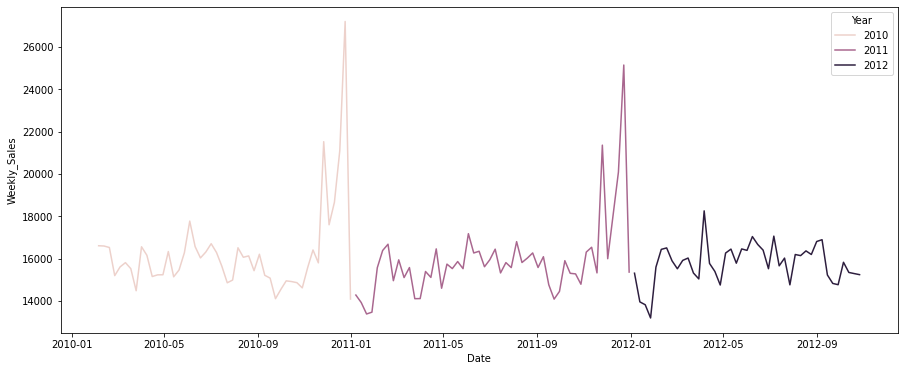

In [ ]:
# Plot the weekly sales value to observe the seasonal pattern
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims) # Set up the size of chart
sns.lineplot(x='Date', y='Weekly_Sales', hue='Year', data=original_data, err_style=None, ax=ax) # Plot chart

### The pattern looks simimar pattern for each year. Great we can apply Time Series like SARIMAX and PROPHET

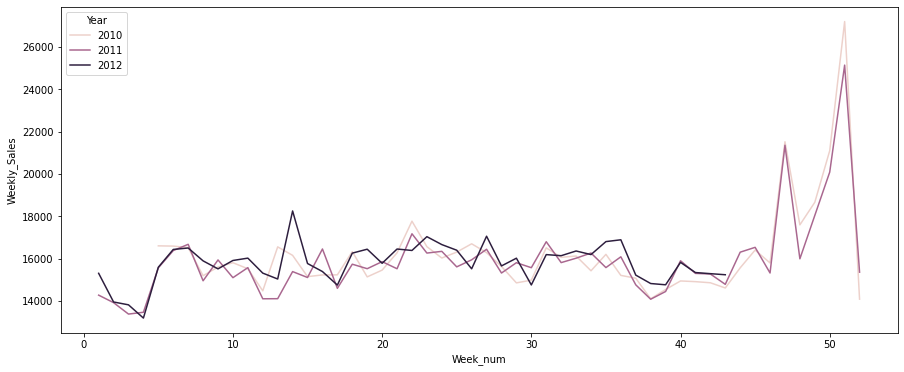

In [ ]:
# The seasonal pattern by weekly observation
fig, ax = plt.subplots(figsize=fig_dims) # Set up the size of chart
sns.lineplot(x='Week_num', y='Weekly_Sales', hue='Year', data=original_data, err_style=None, ax=ax) # Plot chart

Having 3 trends in the same chart can visualize better the Seasonal trending each year.

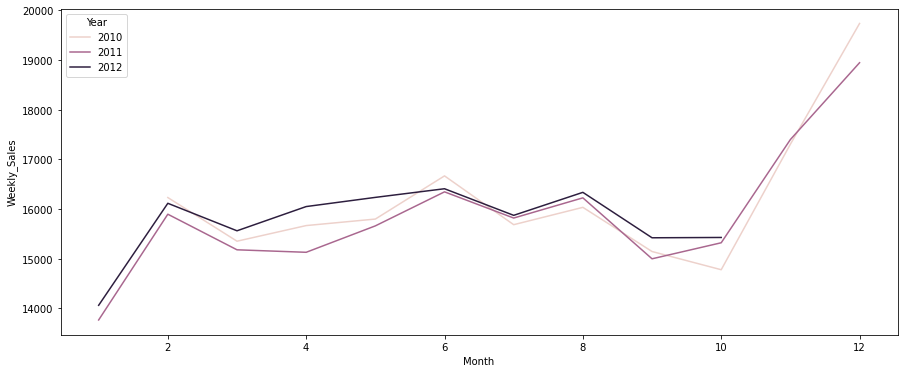

In [ ]:
# The seasonal pattern by monthly observation
fig, ax = plt.subplots(figsize=fig_dims) # Set up the size of chart
sns.lineplot(x='Month', y='Weekly_Sales', hue='Year', data=original_data, err_style=None, ax=ax)

The same sense for monthly sales.

# **The Weekly Sales appear to be Seasonal. We can use Seasonal ARIMA to forecast weekly sales**

In [ ]:
# Slice original dataset into new dataframe to tackle problem
df = original_data[['Date','Weekly_Sales']] # Slice "Date" and "Weekly_Sales" data
df.sort_values(by=['Date'])
df.tail()

,Date,Weekly_Sales
282446,2012-10-19,20775.91
282447,2010-05-21,5350.00
282448,2010-04-30,10939.87
282449,2011-07-01,5013.89
282450,2011-10-14,8103.12


In [ ]:
# Group data by Date and sum total value
df = df.groupby(by=['Date'], as_index=True ).sum()

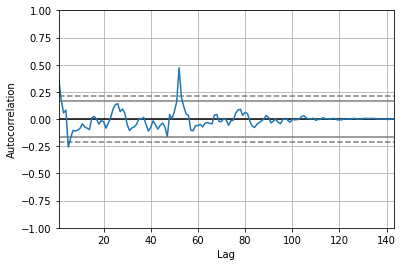

In [ ]:
# Result by plotting
pd.plotting.autocorrelation_plot(df['Weekly_Sales'])
plt.show()

In [ ]:
# Importing new package for ARIMA forecasting
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Calculate the difference between current Weekly_Sales with the last period in last year
df['Seasonal First Difference'] = df['Weekly_Sales'] - df['Weekly_Sales'].shift(52)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


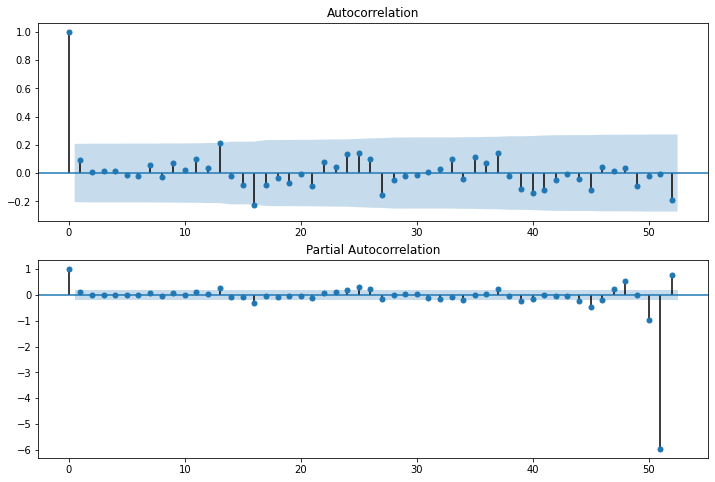

In [ ]:
# Plot Auto Coreelation and Partial Autocorrlation
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsaplots.plot_acf(df['Seasonal First Difference'].iloc[53:],lags=52,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsaplots.plot_pacf(df['Seasonal First Difference'].iloc[53:],lags=52,ax=ax2)



```
# This is formatted as code
```

p, d , q = 0, seasonal_order = 1,1,0,52

In [ ]:
import statsmodels.api as sm

In [ ]:
# Fit the SARIMAX model
model = sm.tsa.statespace.SARIMAX(df['Weekly_Sales'], order=(0, 0, 0), seasonal_order=(1,1,0,52)) # Argument 52 is representative to 52 weeks within a year

results = model.fit() # Train model

# Print out the summary result of model
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)


                            Statespace Model Results                            
Dep. Variable:             Weekly_Sales   No. Observations:                  143
Model:             SARIMAX(1, 1, 0, 52)   Log Likelihood               -1424.210
Date:                  Wed, 24 Nov 2021   AIC                           2852.419
Time:                          11:14:04   BIC                           2857.441
Sample:                      02-05-2010   HQIC                          2854.445
                           - 10-26-2012                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L52      -0.0018      0.006     -0.294      0.769      -0.014       0.010
sigma2      2.185e+12   4.21e-17   5.19e+28      0.000    2.19e+12    2.19e+12
Ljung-Box (Q):                      

**The pay-attention information is No. Observations is 143 which means totally 143 weeks in time-series.**

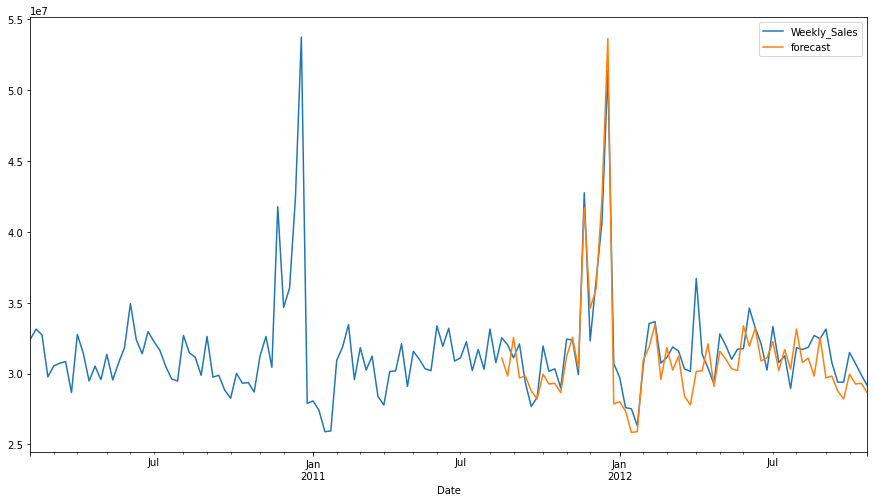

In [ ]:
# Plot the forecast value into the chart to estimate the accuracy of predicting model (overwrite on current data to estimate accuracy)
df['forecast'] = results.predict(start=80,  # The argument 80 stands for the week 80th in the dataset
                                 end=143,   # The argument 143 stands for the last week in the dataset (week number 143)
                                 dynamic=True)

# Plot the predict result on current dataset
df[['Weekly_Sales', 'forecast']].plot(figsize=(15, 8))

### By the positive predicted result above of SARIMAX model, the trained model is used for target predict (future dataset) as following part

In [ ]:
# Import package to predict the future onward
from pandas.tseries.offsets import DateOffset

future_dates = [df.index[-1] + DateOffset(weeks=x) for x in range(0, 24)] # The argument  24 stands for total period difference of the predict time range (from week 142nd to week 166th) 

# Create new dataframe preparing for prediction
future_datest_df = pd.DataFrame(index=future_dates[1:], 
                                columns=df.columns) 

In [ ]:
# Last values in future dataset checking
future_datest_df.tail()

,Weekly_Sales,Seasonal First Difference,forecast
2013-03-08,NaN,NaN,NaN
2013-03-15,NaN,NaN,NaN
2013-03-22,NaN,NaN,NaN
2013-03-29,NaN,NaN,NaN
2013-04-05,NaN,NaN,NaN


In [ ]:
# Manipulating future dataset
future_df = pd.concat([df, future_datest_df])

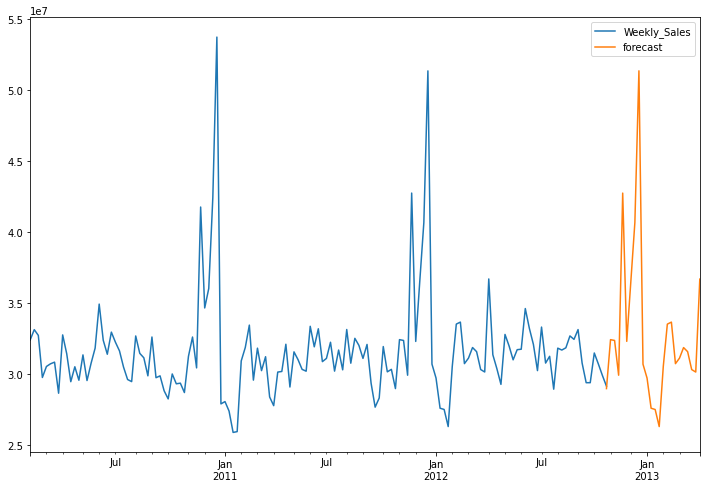

In [ ]:
# Predict the result based on trained SARIMAX model
future_df['forecast'] = results.predict(start=142,   # The argument 142 stands for the week 142nd in the dataset 
                                        end=166,  # The argument 166 stands for the week 166th which also means the target predicted period in future
                                        dynamic=True)  

future_df[['Weekly_Sales', 'forecast']].plot(figsize=(12, 8))

In [ ]:
# Check 24 last values
future_df.tail(24)

,Weekly_Sales,Seasonal First Difference,forecast
2012-10-26,29154000.73,170778.62,2.898271e+07
2012-11-02,NaN,NaN,3.242994e+07
2012-11-09,NaN,NaN,3.237395e+07
2012-11-16,NaN,NaN,2.992598e+07
2012-11-23,NaN,NaN,4.275259e+07
2012-11-30,NaN,NaN,3.230982e+07
2012-12-07,NaN,NaN,3.654975e+07
2012-12-14,NaN,NaN,4.067807e+07
2012-12-21,NaN,NaN,5.136382e+07
2012-12-28,NaN,NaN,3.070112e+07


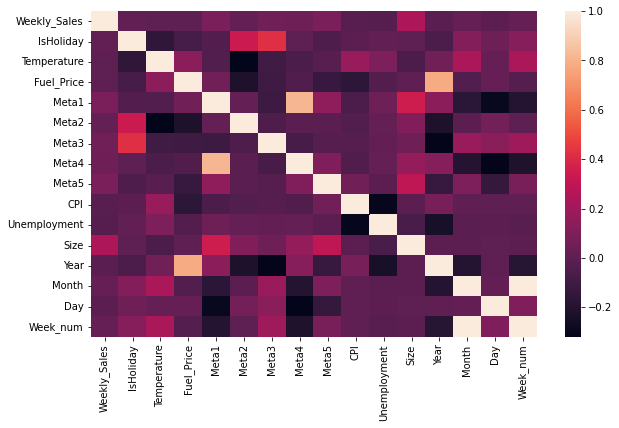

In [ ]:
# Identify correlation among variables to have better insight
original_data['IsHoliday'] = original_data['IsHoliday'].astype(int)
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(original_data.corr(), ax=ax) # Plot heat map to identify the correlation among variables => not clear for Weekly_Sales, just only Size

There are many ways of disaggregating Total Weekly Sales to store:

*   The last period of proportion sales of each store over total sales. 
*   Other variables: size, employees

In this case, I will use size to disaggregate 



In [ ]:
# Use Size to Dis-aggregate total Weekly Sales
df_size = original_data[['Date', 'Size']].groupby(by = ['Date']).sum()

In [ ]:
df_size

,Size
Date,
2010-02-05,266910102
2010-02-12,273991479
2010-02-19,271870239
2010-02-26,267443363
2010-03-05,269561605
...,...
2012-09-28,271536173
2012-10-05,272326397
2012-10-12,273755368


In [ ]:
df_size.iloc[-1]

Size    259295033
Name: 2012-10-26 00:00:00, dtype: int64

In [ ]:
df_store_size = original_data[['Date', 'Store', 'Size']]

In [ ]:
df_store_size

,Date,Store,Size
0,2011-08-26,26,152513
1,2011-03-25,34,158114
2,2010-12-03,21,140167
3,2010-09-17,8,155078
4,2012-05-18,19,203819
...,...,...,...
282446,2012-10-19,27,204184
282447,2010-05-21,39,184109
282448,2010-04-30,14,200898
282449,2011-07-01,15,123737


In [ ]:
df_store_size = original_data[['Date', 'Store', 'Size']].groupby(by=['Date', 'Store']).sum()

In [ ]:
# Pick the latest size of store

df_store_size_latest = df_store_size.loc['2012-10-26']/df_size.iloc[-1]

In [ ]:
df_store_size_latest = df_store_size_latest.reset_index(level = ['Date', 'Store'])
df_store_size_latest = df_store_size_latest[['Store', 'Size']]

In [ ]:
weekly_forecast = future_df['forecast'].iloc[-23:-1]

This is proportion Size of each store

In [ ]:
df_store_size_latest

,Store,Size
0,1,0.026260
1,10,0.023907
2,11,0.037611
3,12,0.018613
4,13,0.040656
5,14,0.034091
6,15,0.021474
7,16,0.009926
8,17,0.017610
9,18,0.018612


In [ ]:
weekly_forecast.index

DatetimeIndex(['2012-11-02', '2012-11-09', '2012-11-16', '2012-11-23',
               '2012-11-30', '2012-12-07', '2012-12-14', '2012-12-21',
               '2012-12-28', '2013-01-04', '2013-01-11', '2013-01-18',
               '2013-01-25', '2013-02-01', '2013-02-08', '2013-02-15',
               '2013-02-22', '2013-03-01', '2013-03-08', '2013-03-15',
               '2013-03-22', '2013-03-29'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
result = []
for i in range(len(weekly_forecast)):
  result.append(weekly_forecast.iloc[i] * df_store_size_latest['Size'])


In [ ]:
result = pd.DataFrame(result).set_index(weekly_forecast.index).transpose()

In [ ]:
result = result.set_index(df_store_size_latest['Store'])

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

This is the forecast sales for the nex 22 weeks using SARIMAX


In [ ]:
result

,2012-11-02,2012-11-09,2012-11-16,2012-11-23,2012-11-30,2012-12-07,2012-12-14,2012-12-21,2012-12-28,2013-01-04,2013-01-11,2013-01-18,2013-01-25,2013-02-01,2013-02-08,2013-02-15,2013-02-22,2013-03-01,2013-03-08,2013-03-15,2013-03-22,2013-03-29
Store,,,,,,,,,,,,,,,,,,,,,,
1,"851,621.15","850,150.91","785,866.34","1,122,697.53","848,466.81","959,808.75","1,068,219.73","1,348,831.34","806,221.86","780,589.26","724,782.14","722,443.16","690,862.61","801,882.81","880,324.95","884,066.18","807,227.29","817,471.74","836,974.97","829,399.21","796,311.56","791,693.38"
10,"775,317.78","773,979.27","715,454.46","1,022,106.32","772,446.07","873,812.01","972,509.61","1,227,979.04","733,986.16","710,650.19","659,843.26","657,713.85","628,962.85","730,035.88","801,449.78","804,855.81","734,901.52","744,228.08","761,983.87","755,086.88","724,963.81","720,759.40"
11,"1,219,735.90","1,217,630.15","1,125,558.47","1,607,985.54","1,215,218.10","1,374,687.79","1,529,959.61","1,931,866.09","1,154,712.69","1,118,000.36","1,038,070.50","1,034,720.50","989,489.21","1,148,498.08","1,260,846.98","1,266,205.36","1,156,152.73","1,170,825.35","1,198,758.89","1,187,908.50","1,140,518.65","1,133,904.24"
12,"603,615.41","602,573.32","557,009.46","795,750.00","601,379.67","680,297.05","757,137.01","956,030.01","571,437.12","553,269.14","513,713.95","512,056.12","489,672.34","568,361.67","623,960.20","626,611.93","572,149.76","579,410.86","593,234.43","587,864.86","564,412.86","561,139.56"
13,"1,318,466.26","1,316,190.06","1,216,665.72","1,738,142.39","1,313,582.77","1,485,960.58","1,653,800.73","2,088,239.14","1,248,179.80","1,208,495.83","1,122,096.13","1,118,474.97","1,069,582.47","1,241,462.16","1,362,905.03","1,368,697.15","1,249,736.41","1,265,596.70","1,295,791.28","1,284,062.62","1,232,836.85","1,225,687.04"
14,"1,105,554.69","1,103,646.06","1,020,193.34","1,457,459.72","1,101,459.81","1,246,001.31","1,386,737.92","1,751,021.35","1,046,618.39","1,013,342.75","940,895.25","937,858.84","896,861.72","1,040,985.54","1,142,817.30","1,147,674.08","1,047,923.63","1,061,222.73","1,086,541.36","1,076,706.69","1,033,753.08","1,027,757.86"
15,"696,408.46","695,206.18","642,637.83","918,079.66","693,829.02","784,878.27","873,530.75","1,102,999.33","659,283.44","638,322.53","592,686.56","590,773.88","564,949.06","655,735.21","719,880.83","722,940.21","660,105.63","668,482.97","684,431.63","678,236.59","651,179.36","647,402.86"
16,"321,912.40","321,356.65","297,057.11","424,379.15","320,720.06","362,807.26","403,786.57","509,857.62","304,751.49","295,062.38","273,967.31","273,083.18","261,145.75","303,111.33","332,762.42","334,176.61","305,131.54","309,003.94","316,376.15","313,512.52","301,005.40","299,259.73"
17,"571,094.55","570,108.61","526,999.57","752,877.54","568,979.26","643,644.82","716,344.90","904,522.19","540,649.92","523,460.78","486,036.69","484,468.18","463,290.36","537,740.17","590,343.23","592,852.09","541,324.16","548,194.06","561,272.86","556,192.58","534,004.11","530,907.16"
